In [ ]:
#! pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
# from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
for dirname, _, filenames in os.walk('./Alzheimer_s Dataset/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Alzheimer_s Dataset/train\MildDemented\mildDem0.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem1.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem10.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem100.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem101.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem102.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem103.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem104.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem105.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem106.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem107.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem108.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem109.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem11.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem110.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem111.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem112.jpg
./Alzheimer_s Dataset/train\MildDemented\mildDem113.jp

In [4]:
images = []
labels = []
for subfolder in tqdm(os.listdir('./Alzheimer_s Dataset/')):
    subfolder_path = os.path.join('./Alzheimer_s Dataset/', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)
            
alz_df = pd.DataFrame({'image': images, 'label': labels})
alz_df

100%|██████████| 2/2 [00:00<00:00, 12.09it/s]


image             label
0     ./Alzheimer_s Dataset/test\MildDemented\26 (19...      MildDemented
1     ./Alzheimer_s Dataset/test\MildDemented\26 (20...      MildDemented
2     ./Alzheimer_s Dataset/test\MildDemented\26 (21...      MildDemented
3     ./Alzheimer_s Dataset/test\MildDemented\26 (22...      MildDemented
4     ./Alzheimer_s Dataset/test\MildDemented\26 (23...      MildDemented
...                                                 ...               ...
6395  ./Alzheimer_s Dataset/train\VeryMildDemented\v...  VeryMildDemented
6396  ./Alzheimer_s Dataset/train\VeryMildDemented\v...  VeryMildDemented
6397  ./Alzheimer_s Dataset/train\VeryMildDemented\v...  VeryMildDemented
6398  ./Alzheimer_s Dataset/train\VeryMildDemented\v...  VeryMildDemented
6399  ./Alzheimer_s Dataset/train\VeryMildDemented\v...  VeryMildDemented

[6400 rows x 2 columns]

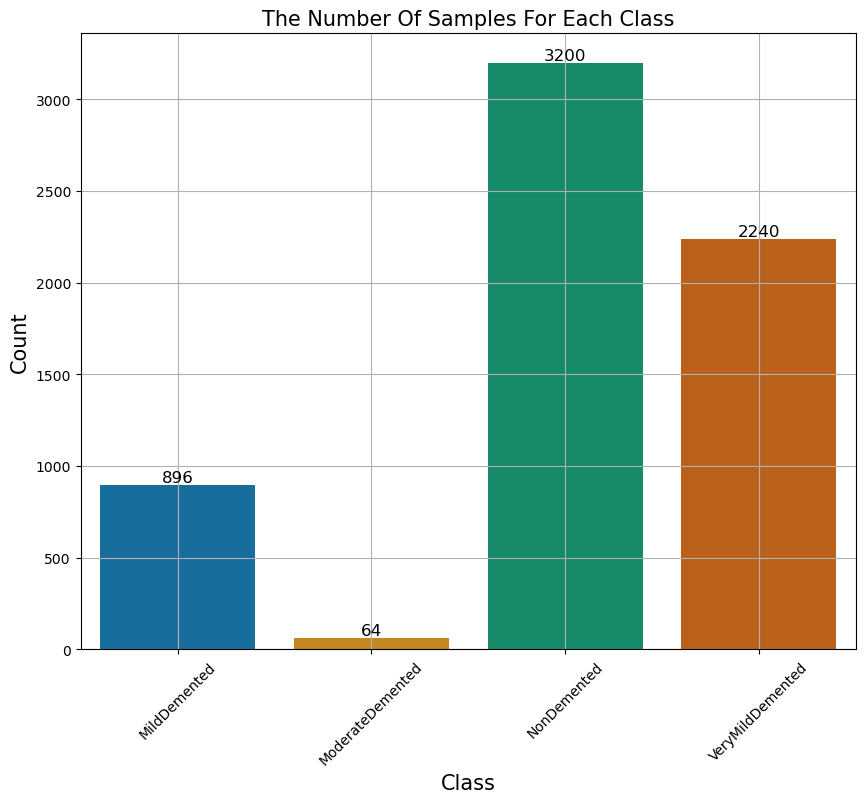

In [5]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=alz_df.label,palette='colorblind')
ax.bar_label(ax.containers[0], fontsize=12)
ax.set_xlabel("Class",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.title('The Number Of Samples For Each Class',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The MRI image dataset is imbalanced. Oversampling using SMOTE or GAN should be used.

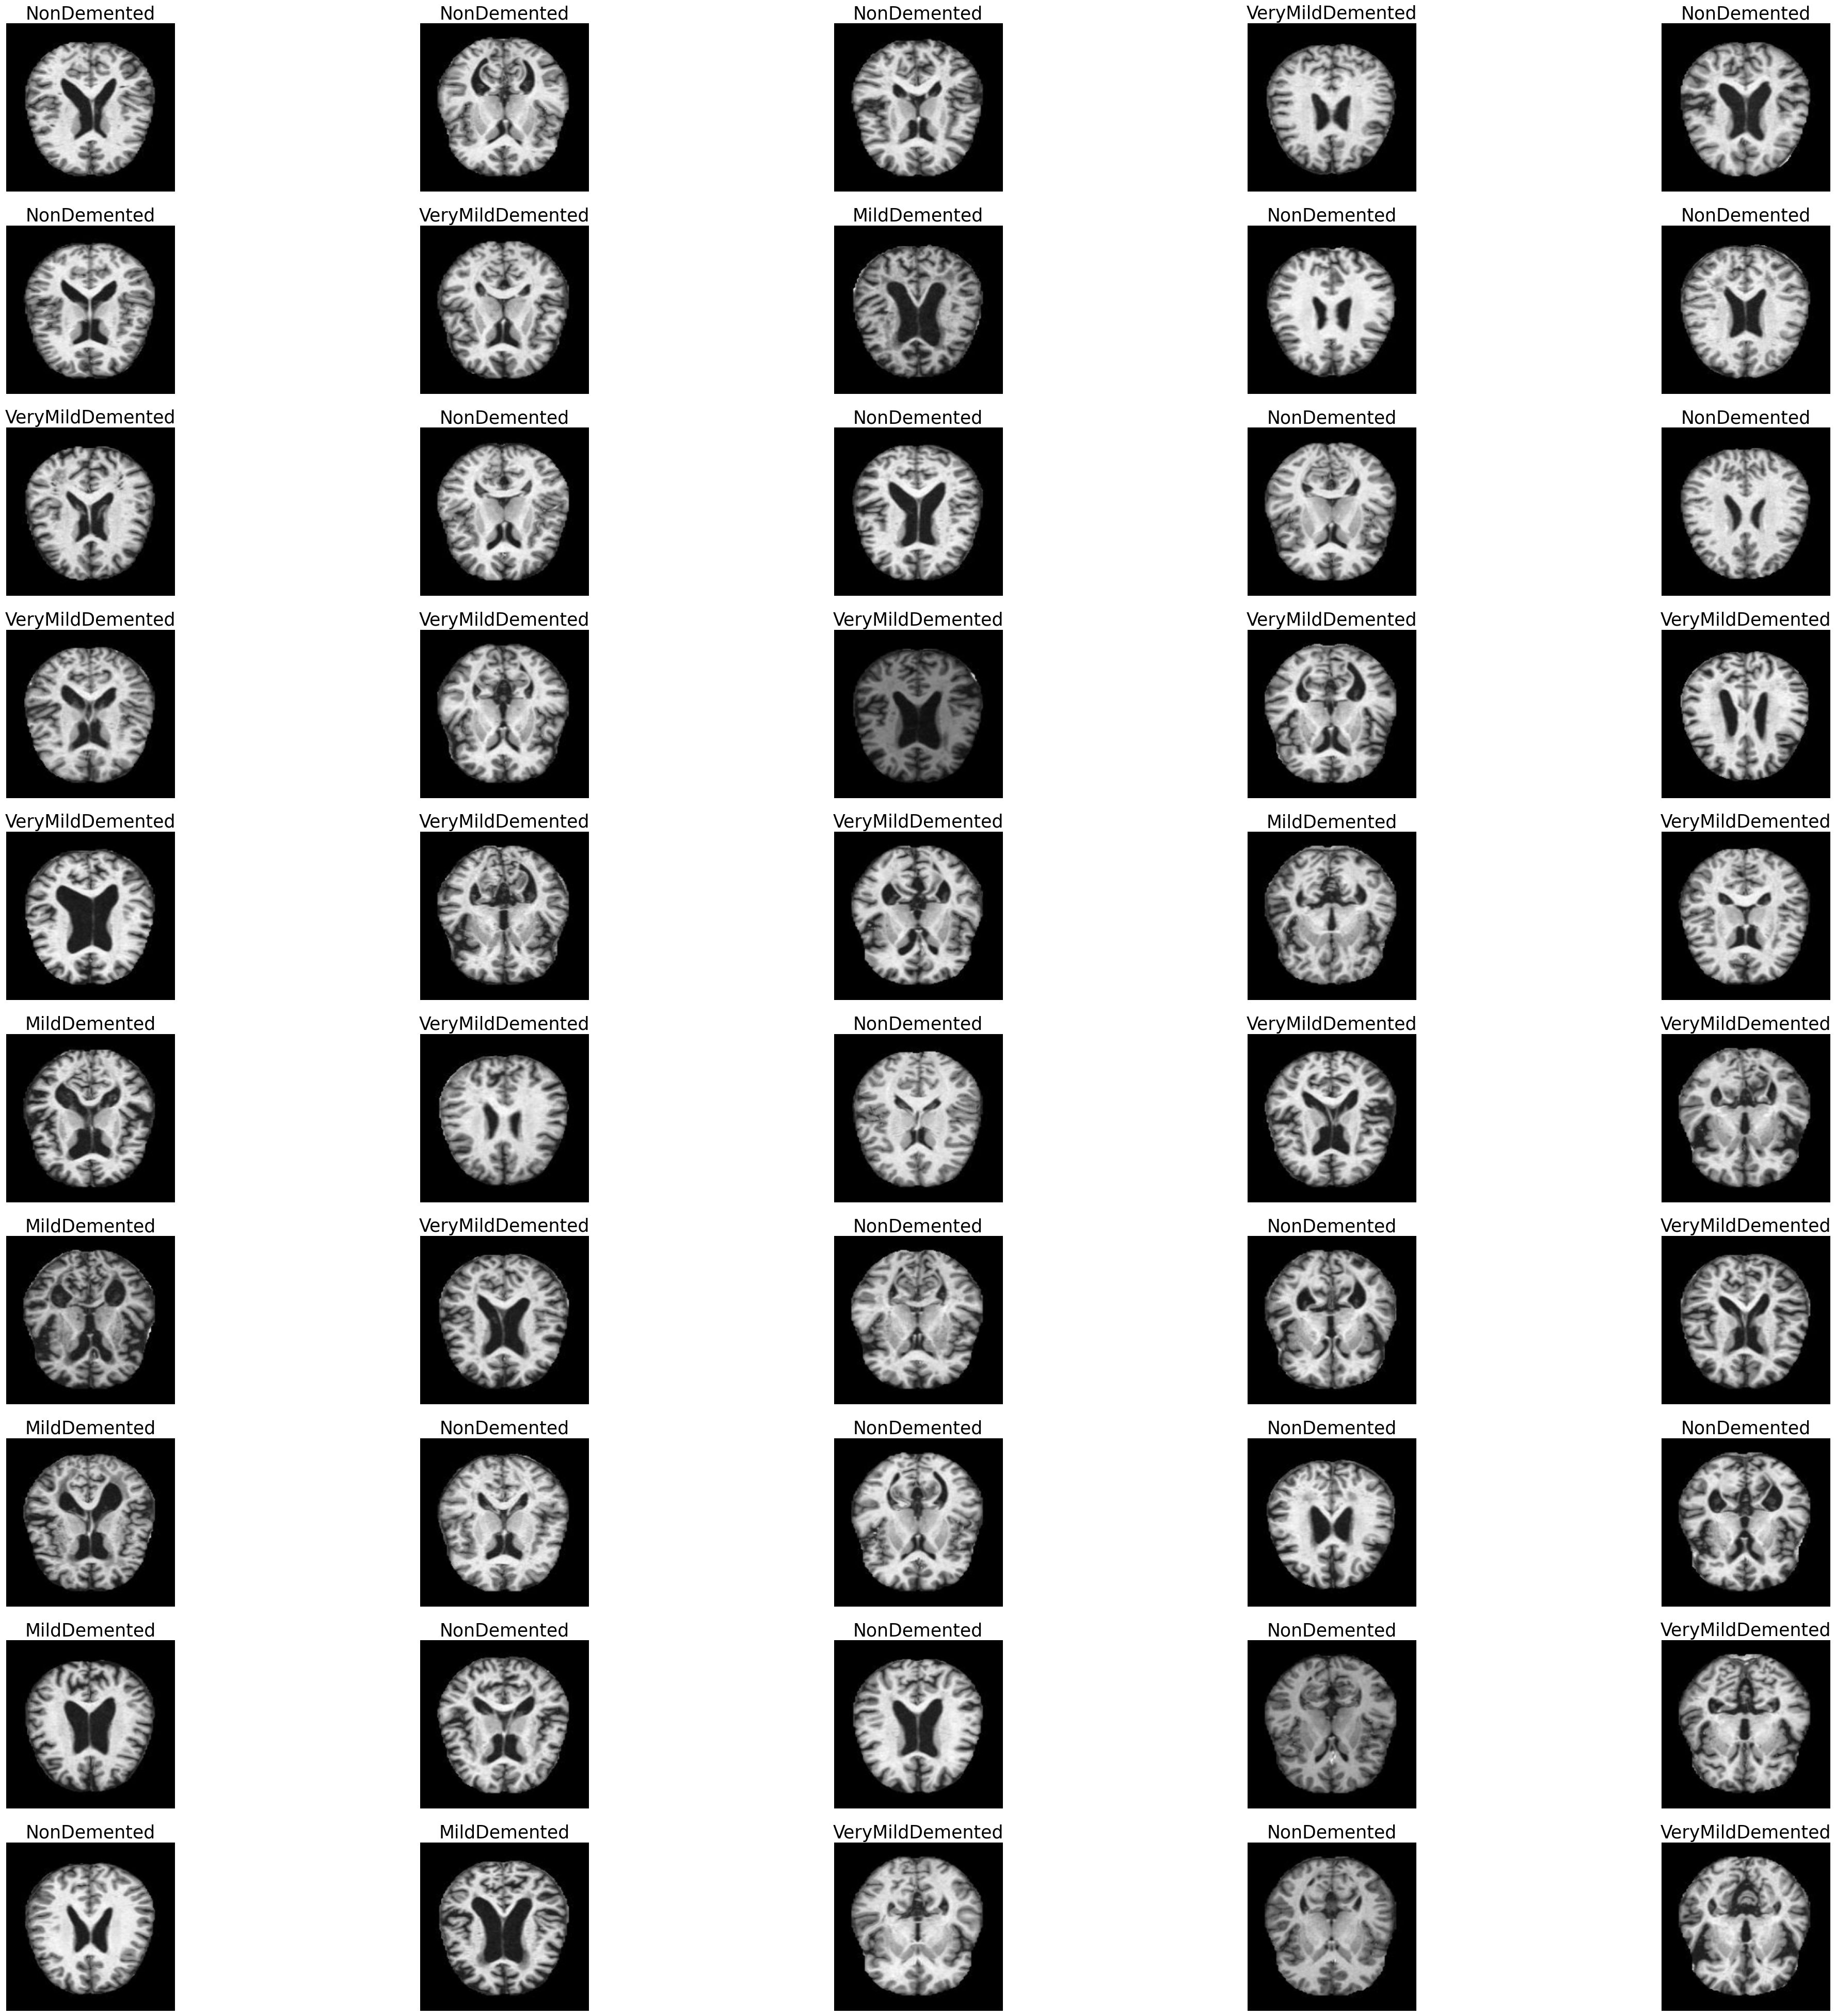

In [6]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(alz_df),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(alz_df.image[i])
    img=cv2.resize(img,(224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(alz_df.label[i],fontsize=25)

# Data Augmentation

#### Preprocessing to use GAN to oversample.

In [53]:
mod_dem = "C:/Users/tessa/OneDrive/Documents/1. MS BMI/4. Spring 2024/1. Deep Learning 6114/DL_Project/Alzheimer_s Dataset/train/ModerateDemented"
mild_dem = "C:/Users/tessa/OneDrive/Documents/1. MS BMI/4. Spring 2024/1. Deep Learning 6114/DL_Project/Alzheimer_s Dataset/train/MildDemented"
vermild_dem = "C:/Users/tessa/OneDrive/Documents/1. MS BMI/4. Spring 2024/1. Deep Learning 6114/DL_Project/Alzheimer_s Dataset/train/VeryMildDemented"


def load_images(folder):
    
    imgs = []
    target = 1
    labels = []
    for i in os.listdir(folder):
        img_dir = os.path.join(folder,i)
        try:
            img = cv2.imread(img_dir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (128,128))
            imgs.append(img)
            labels.append(target)
        except:
            continue
        
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    return imgs, labels

In [15]:
mild_dl_train = DataLoader(mild_X_train, batch_size=batch_size, shuffle=True)

In [16]:
vermild_data, vermild_labels = load_images(mod_dem)
vermild_data.shape, vermild_labels.shape

((52, 128, 128), (52,))

In [50]:
vermild_X_train = vermild_data[idxs]
vermild_X_train.shape

(20, 128, 128)

In [18]:
# # Normalize the Images
# vermild_X_train = (vermild_X_train.astype(np.float32) - 127.5) / 127.5

# # Reshape images 
# vermild_X_train = vermild_X_train.reshape(-1, 128,128,1)

# # Check shape
# vermild_X_train.shape

(20, 128, 128, 1)

In [51]:
vermild_dl_train = DataLoader(vermild_X_train, batch_size=batch_size, shuffle=True)
len(vermild_dl_train)

1

In [19]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms
# from sklearn.model_selection import train_test_split
# import torch.nn as nn
# import torch.nn.functional as F
# from torchinfo import summary

# # Define batch size
# batch_size = 64

# # Create DataLoader objects
# dl_train = DataLoader(train_data, batch_size=batch_size, shuffle=True)
# dl_test = DataLoader(train_labels, batch_size=batch_size, shuffle=False)

# print(len(dl_train))
# print(len(dl_test))

#### Back up oversample using SMOTE.

In [ ]:
from sklearn.model_selection import train_test_split

Size=(128,128)

work_dr = ImageDataGenerator(
    rescale = 1./255
)
train_data_gen = work_dr.flow_from_dataframe(alz_df,x_col='image',y_col='label', target_size=Size, batch_size=6500, shuffle=False)

for i in range(len(train_data_gen)):
    train_data, train_labels = train_data_gen[i]

In [23]:
from imblearn.over_sampling import SMOTE

class_num = pd.unique(alz_df['label'])
class_num

sm = SMOTE(random_state=42)
train_data_sm, train_labels_sm = sm.fit_resample(train_data.reshape(-1, 128 * 128 * 3), train_labels)
train_data_sm = train_data_sm.reshape(-1, 128,128, 3)
print(train_data_sm.shape, train_labels_sm.shape)

(12800, 128, 128, 3) (12800, 4)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_data,train_labels, test_size=0.3, random_state=42,shuffle=True,stratify=train_labels)

C:\Users\tessa\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


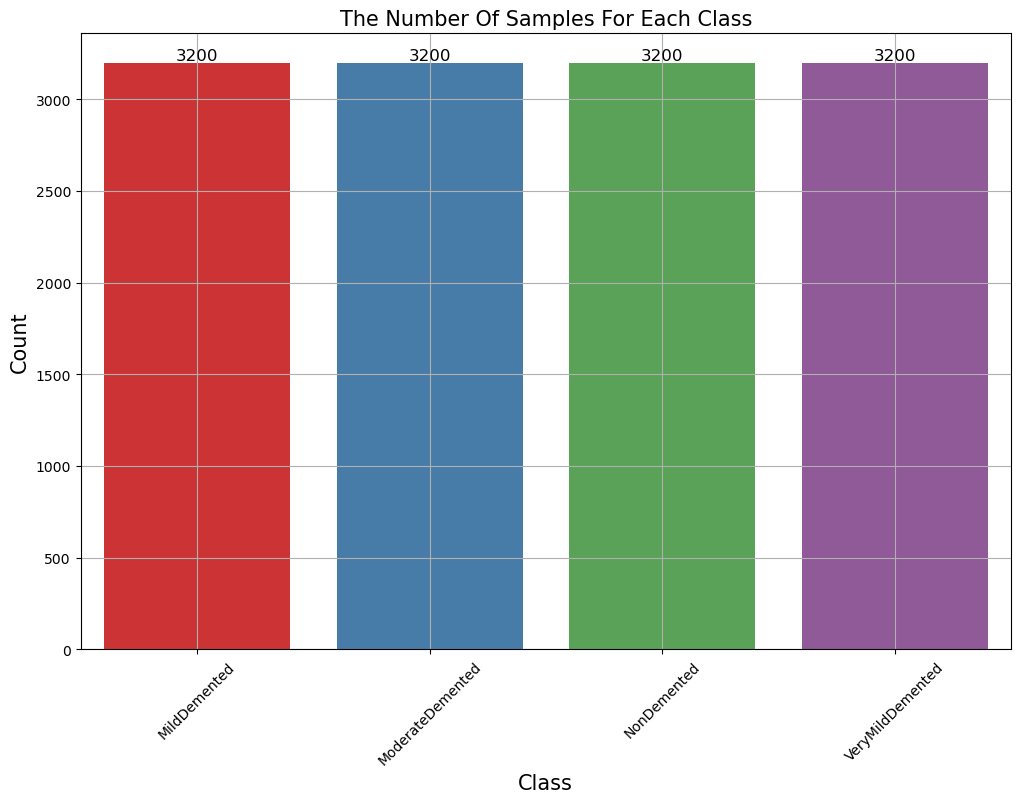

In [25]:
labels=[class_num[i] for i in np.argmax(train_labels_sm,axis=1) ]
plt.figure(figsize=(12,8))
ax = sns.countplot(x=labels,palette='Set1')
ax.bar_label(ax.containers[0], fontsize=12)
ax.set_xlabel("Class",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.title('The Number Of Samples For Each Class',fontsize=15)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# GAN for oversampling

In [43]:
codings_size = 100
image_size = (28, 28)

In [44]:
g = nn.Sequential(
    nn.ConvTranspose2d(100, 128, 4, 1, 1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(),

    nn.ConvTranspose2d(128, 64, 3, 2, 1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(),

    nn.ConvTranspose2d(64, 32, 4, 2, 1, bias=False),
    nn.BatchNorm2d(32),
    nn.ReLU(),

    nn.ConvTranspose2d(32, 1, 4, 2, 1, bias=False),
    nn.Tanh()
)

summary(g, input_size=(64, codings_size, 1, 1), device="cpu")

d = nn.Sequential(
    nn.Conv2d(1, 32, 4, 2, 1, bias=False),
    nn.LeakyReLU(0.2),

    nn.Conv2d(32, 64, 4, 2, 1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2),

    nn.Conv2d(64, 128, 3, 2, 1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2),

    nn.Conv2d(128, 1, 4, 1, 0, bias=False),
    nn.Flatten(),
    nn.Sigmoid()
)

summary(d, input_size=(64, 1, 28, 28), device="cpu")

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [64, 1]                   --
├─Conv2d: 1-1                            [64, 32, 14, 14]          512
├─LeakyReLU: 1-2                         [64, 32, 14, 14]          --
├─Conv2d: 1-3                            [64, 64, 7, 7]            32,768
├─BatchNorm2d: 1-4                       [64, 64, 7, 7]            128
├─LeakyReLU: 1-5                         [64, 64, 7, 7]            --
├─Conv2d: 1-6                            [64, 128, 4, 4]           73,728
├─BatchNorm2d: 1-7                       [64, 128, 4, 4]           256
├─LeakyReLU: 1-8                         [64, 128, 4, 4]           --
├─Conv2d: 1-9                            [64, 1, 1, 1]             2,048
├─Flatten: 1-10                          [64, 1]                   --
├─Sigmoid: 1-11                          [64, 1]                   --
Total params: 109,440
Trainable params: 109,440
Non-trainable params: 0

In [45]:
loss_fn = nn.BCELoss()
g_optimizer = torch.optim.Adam(g.parameters())
d_optimizer = torch.optim.Adam(d.parameters())

In [46]:
# Training the generator
def g_training_step(d, g, optimizer, x_batch):
    batch_size = x_batch.size(0)
    
    z = torch.randn(batch_size, codings_size, 1, 1)

    pred_fake = d(g(z))
    loss = loss_fn(pred_fake, torch.ones(batch_size, 1)) # Trying to fool the discriminator
                                                         # by passing the fake data as real.

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    return loss.item()
    
# Training the discriminator
def d_training_step(d, g, optimizer, x_batch):
    batch_size = x_batch.size(0)
    
    # Train discriminator on a real batch
    pred_real = d(x_batch)
    loss_real = loss_fn(pred_real, torch.ones(batch_size, 1))

    # Train discriminator on a fake batch
    z = torch.randn(batch_size, codings_size, 1, 1)

    pred_fake = d(g(z))
    loss_fake = loss_fn(pred_fake, torch.zeros(batch_size, 1))

    # Total loss
    loss = loss_real + loss_fake
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
    return loss.item()

In [48]:
def create_samples(g, z):
    g_output = g(z)
    images = torch.reshape(g_output, (batch_size, *image_size))    
    return (images + 1 ) / 2.0

batch_size = 32

z = torch.randn(batch_size, codings_size, 1, 1)

epoch_samples = []

all_d_losses = []
all_g_losses = []

epochs = 20
for epoch in range( epochs):           
    d_losses, g_losses = [], []
    
    for x_batch in vermild_X_train:
        d_losses.append(d_training_step(d, g, d_optimizer, x_batch))
        g_losses.append(g_training_step(d, g, g_optimizer, x_batch))
 
    all_d_losses.append(torch.tensor(d_losses).mean())
    all_g_losses.append(torch.tensor(g_losses).mean())

    print(f"Epoch{epoch + 1: 3d}/{epochs}: g_loss={all_g_losses[-1]:.4f}, d_loss={all_d_losses[-1]:.4f}")
    epoch_samples.append(create_samples(g, z).detach().numpy())

TypeError: 'int' object is not callable

In [ ]:
plt.plot(all_g_losses, label='Generator loss')
plt.plot(all_d_losses, label='Discriminator loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
selected_epochs = [1, 2, 4, 10, 20]
fig = plt.figure(figsize=(10, 14))
for i,e in enumerate(selected_epochs):
    for j in range(5):
        plt.subplot(6, 5, i*5+j+1)
        plt.xticks([])
        plt.yticks([])
        if j == 0:
            plt.title( f'Epoch {e}')
        image = np.clip(epoch_samples[e-1][j], 0, 1)
        plt.imshow(image, cmap='binary')
    
plt.show()

In [ ]:
z = torch.randn(batch_size, codings_size, 1, 1)

images = np.clip(g(z).detach().permute(0, 2, 3, 1), 0, 1)
fig = plt.figure(figsize=(10, 14))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap='binary')

In [ ]:
batch_size = 64
codings_size = 100

g = nn.Sequential(
        nn.ConvTranspose2d(codings_size, 256, 7, 1, 0, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),

        nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),

        nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),

        nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
        nn.Tanh()
)

# g = nn.Sequential(
#     nn.ConvTranspose2d(codings_size, 128, 2, 1, 0, bias=False),
#     nn.BatchNorm2d(128),
#     nn.ReLU(),

#     nn.ConvTranspose2d(128, 64, 2, 2, 1, bias=False),
#     nn.BatchNorm2d(64),
#     nn.ReLU(),

#     nn.ConvTranspose2d(64, 32, 2, 2, 1, bias=False),
#     nn.BatchNorm2d(32),
#     nn.ReLU(),

#     nn.ConvTranspose2d(32, 1, 2, 2, 1, bias=False),
#     nn.Tanh()
# )

display(summary(g, input_size=(batch_size, codings_size, 1, 1), device="cpu"))

d = nn.Sequential(
    nn.Conv2d(1, 32, 2, 2, 1, bias=False),
    nn.LeakyReLU(0.2),

    nn.Conv2d(32, 64, 2, 2, 1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2),

    nn.Conv2d(64, 128, 2, 2, 1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2),

    nn.Conv2d(128, 1, 2, 1, 0, bias=False),
    nn.Flatten(),
    nn.Sigmoid()
)

display(summary(d, input_size=(batch_size, 1, 28, 28), device="cpu"))

In [ ]:
loss_fn = nn.BCELoss()
g_optimizer = torch.optim.Adam(g.parameters())
d_optimizer = torch.optim.Adam(d.parameters())

In [ ]:
# # Training the generator
# def g_training_step(d, g, optimizer, x_batch):
#     batch_size = x_batch.size(0)
    
#     z = torch.randn(batch_size, codings_size, 1, 1)

#     pred_fake = d(g(z))
#     loss = loss_fn(pred_fake, torch.ones(batch_size, 1)) # Trying to fool the discriminator
#                                                          # by passing the fake data as real.

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
        
#     return loss.item()

def g_training_step(d, g, optimizer, x_batch):
    optimizer.zero_grad()
    z = torch.randn(batch_size, codings_size, 1, 1)
    pred_fake = d(g(z))
    target = torch.ones_like(pred_fake)  # Target tensor with ones (indicating real images)
    loss_fn = nn.BCELoss()
    loss = loss_fn(pred_fake, target)
    loss.backward()
    optimizer.step()
    return loss.item()
    
# Training the discriminator
def d_training_step(d, g, optimizer, x_batch):
    batch_size = x_batch.size(0)

    # Convert input data to grayscale
    x_batch_gray = torch.mean(x_batch, dim=1, keepdim=True)

    # Train discriminator on a real batch
    pred_real = d(x_batch_gray)
    loss_real = loss_fn(pred_real, torch.ones_like(pred_real))

    # Train discriminator on a fake batch
    z = torch.randn(batch_size, codings_size, 1, 1)
    pred_fake = d(g(z))
    loss_fake = loss_fn(pred_fake, torch.zeros_like(pred_fake))

    # Total loss
    loss = loss_real + loss_fake

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.item()

In [37]:
def create_samples(g, z):
    g_output = g(z)
    print("Generator output shape:", g_output.shape)
    # images = torch.reshape(g_output, (batch_size, *Size))  
    images = g_output  # No need to reshape if you want to keep the same shape
    return (images + 1) / 2.0

z = torch.randn(batch_size, codings_size, 1, 1)

epoch_samples = []

all_d_losses = []
all_g_losses = []

epochs = 20
for epoch in range( epochs):           
    d_losses, g_losses = [], []
    
    for x_batch in vermild_X_train:
        d_losses.append(d_training_step(d, g, d_optimizer, x_batch))
        g_losses.append(g_training_step(d, g, g_optimizer, x_batch))
 
    all_d_losses.append(torch.tensor(d_losses).mean())
    all_g_losses.append(torch.tensor(g_losses).mean())

    print(f"Epoch{epoch + 1: 3d}/{epochs}: g_loss={all_g_losses[-1]:.4f}, d_loss={all_d_losses[-1]:.4f}")
    epoch_samples.append(create_samples(g, z).detach().numpy())

TypeError: 'int' object is not callable

In [ ]:
plt.plot(all_g_losses, label='Generator loss')
plt.plot(all_d_losses, label='Discriminator loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
selected_epochs = [1, 2, 4, 10, 20]
fig = plt.figure(figsize=(10, 14))
for i, e in enumerate(selected_epochs):
    for j in range(5):
        plt.subplot(6, 5, i*5+j+1)
        plt.xticks([])
        plt.yticks([])
        if j == 0:
            plt.title(f'Epoch {e}')
        image = np.clip(epoch_samples[e-1][j], 0, 1)
        # Reshape image to (56, 56)
        image = np.squeeze(image)
        plt.imshow(image, cmap='gray', interpolation='nearest')

plt.show()


In [ ]:
z = torch.randn(batch_size, codings_size, 1, 1)

images = np.clip(g(z).detach().permute(0, 2, 3, 1), 0, 1)
fig = plt.figure(figsize=(10, 14))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap='gray', interpolation='nearest')

# Classification Models

### Machine Learning Models

#### Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()

nsamples, nx, ny, nrgb = X_train.shape
X_train_rf = X_train.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = X_test.shape
X_test_rf = X_test.reshape((nsamples,nx*ny*nrgb))

rf_model.fit(X_train_rf,y_train)

y_pred_rf = rf_model.predict(X_test_rf)
y_pred_rf

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Accuracy:',accuracy_score(y_pred_rf, y_test))
print(classification_report(y_pred_rf, y_test, zero_division=1))

0.7713541666666667
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       102
           1       0.00      1.00      0.00         0
           2       0.89      0.95      0.92       895
           3       0.79      0.99      0.88       532

   micro avg       0.77      0.97      0.86      1529
   macro avg       0.51      0.99      0.59      1529
weighted avg       0.82      0.97      0.88      1529
 samples avg       0.77      0.97      0.77      1529



##### Random Forest Hyperparameter Tuning & K-fold Cross Validation

In [41]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Create Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search to data
grid_search.fit(X_train_rf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator
best_rf_model = grid_search.best_estimator_

# Predictions
y_pred_rf = best_rf_model.predict(X_test_rf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.7802083333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57       269
           1       1.00      0.00      0.00        19
           2       0.95      0.90      0.92       960
           3       0.99      0.79      0.88       672

   micro avg       0.96      0.78      0.86      1920
   macro avg       0.98      0.52      0.59      1920
weighted avg       0.97      0.78      0.85      1920
 samples avg       0.97      0.78      0.78      1920



In [42]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_rf, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_rf)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))

Cross-validation Scores: [0.68415179 0.68415179 0.68303571 0.71763393 0.71205357]
Mean CV Accuracy: 0.6962053571428571
Accuracy: 0.7802083333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57       269
           1       1.00      0.00      0.00        19
           2       0.95      0.90      0.92       960
           3       0.99      0.79      0.88       672

   micro avg       0.96      0.78      0.86      1920
   macro avg       0.98      0.52      0.59      1920
weighted avg       0.97      0.78      0.85      1920
 samples avg       0.97      0.78      0.78      1920



### K-Nearest Neighbor

In [43]:
from sklearn.neighbors import KNeighborsClassifier

nsamples, nx, ny, nrgb = X_train.shape
X_train_knn = X_train.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = X_test.shape
X_test_knn = X_test.reshape((nsamples,nx*ny*nrgb))

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=4)  

# Train the KNN model
knn_model.fit(X_train_knn, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_knn)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=1))

Accuracy: 0.9416666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       269
           1       0.94      0.84      0.89        19
           2       0.99      0.97      0.98       960
           3       0.99      0.93      0.96       672

   micro avg       0.99      0.94      0.97      1920
   macro avg       0.98      0.91      0.94      1920
weighted avg       0.99      0.94      0.97      1920
 samples avg       0.99      0.94      0.94      1920

